In [39]:
import pandas as pd
import numpy as np

# 输出结果为数据的前面 5 行和末尾 5 行，中间部分以 … 代替。
df = pd.read_csv('Galaxy.csv')
print(df)
df = df.replace(0, np.nan)
df.dropna(how='any', inplace=True)
print(df)

           Unnamed: 0  hourzero2one  hoursix2ten
0       dme-bantam-3p          2093         3286
1       dme-bantam-5p           189         1533
2        dme-let-7-3p             0            0
3        dme-let-7-5p            23           87
4        dme-miR-1-3p           791        31871
..                ...           ...          ...
464     dme-miR-9c-5p          2840         1803
465  dme-miR-iab-4-3p            67          263
466  dme-miR-iab-4-5p           102         2616
467  dme-miR-iab-8-3p             1           29
468  dme-miR-iab-8-5p             0            6

[469 rows x 3 columns]
           Unnamed: 0  hourzero2one  hoursix2ten
0       dme-bantam-3p        2093.0       3286.0
1       dme-bantam-5p         189.0       1533.0
3        dme-let-7-5p          23.0         87.0
4        dme-miR-1-3p         791.0      31871.0
5        dme-miR-1-5p         110.0        713.0
..                ...           ...          ...
463     dme-miR-9c-3p         475.0        21

In [40]:
df['hourzero2one'] = df['hourzero2one']* 1000000 / 2100000 
df['hoursix2ten'] = df['hoursix2ten']* 1000000 / 2500000 
print(df)
print("*************************************************")
df = df[(df['hourzero2one'] > 10) | (df['hoursix2ten'] > 10)]
print(df)

           Unnamed: 0  hourzero2one  hoursix2ten
0       dme-bantam-3p    996.666667       1314.4
1       dme-bantam-5p     90.000000        613.2
3        dme-let-7-5p     10.952381         34.8
4        dme-miR-1-3p    376.666667      12748.4
5        dme-miR-1-5p     52.380952        285.2
..                ...           ...          ...
463     dme-miR-9c-3p    226.190476         85.2
464     dme-miR-9c-5p   1352.380952        721.2
465  dme-miR-iab-4-3p     31.904762        105.2
466  dme-miR-iab-4-5p     48.571429       1046.4
467  dme-miR-iab-8-3p      0.476190         11.6

[195 rows x 3 columns]
*************************************************
           Unnamed: 0  hourzero2one  hoursix2ten
0       dme-bantam-3p    996.666667       1314.4
1       dme-bantam-5p     90.000000        613.2
3        dme-let-7-5p     10.952381         34.8
4        dme-miR-1-3p    376.666667      12748.4
5        dme-miR-1-5p     52.380952        285.2
..                ...           ...         

In [41]:
import numpy
df['log2 fold change'] = df['hourzero2one']/df['hoursix2ten']
df

df['log2 fold change'] = numpy.log2(df['log2 fold change'])
df

,Unnamed: 0,hourzero2one,hoursix2ten,log2 fold change
0,dme-bantam-3p,996.666667,1314.4,-0.399221
1,dme-bantam-5p,90.000000,613.2,-2.768361
3,dme-let-7-5p,10.952381,34.8,-1.667843
4,dme-miR-1-3p,376.666667,12748.4,-5.080884
5,dme-miR-1-5p,52.380952,285.2,-2.444860
...,...,...,...,...
463,dme-miR-9c-3p,226.190476,85.2,1.408613
464,dme-miR-9c-5p,1352.380952,721.2,0.907030
465,dme-miR-iab-4-3p,31.904762,105.2,-1.721291
466,dme-miR-iab-4-5p,48.571429,1046.4,-4.429183


In [42]:
max5 = df.nlargest(10,'log2 fold change',keep='all')
print(max5)

min5 = df.nsmallest(10,'log2 fold change',keep='all')
print(min5)

         Unnamed: 0  hourzero2one  hoursix2ten  log2 fold change
154    dme-miR-3-5p    552.380952          9.2          5.907886
309  dme-miR-6-1-5p   1897.142857         46.8          5.341176
185  dme-miR-317-3p    104.761905          2.8          5.225544
311  dme-miR-6-3-5p   2300.952381         87.2          4.721759
141  dme-miR-286-5p   5319.523810        371.2          3.841028
170  dme-miR-309-5p    322.380952         28.8          3.484626
310  dme-miR-6-2-5p   1231.904762        114.4          3.428732
171  dme-miR-310-3p   5853.809524        829.6          2.818888
133  dme-miR-282-5p   4770.476190        850.4          2.487920
194   dme-miR-33-5p    180.000000         38.4          2.228819
          Unnamed: 0  hourzero2one  hoursix2ten  log2 fold change
15   dme-miR-1002-5p      4.761905       1295.6         -8.087866
112  dme-miR-263b-3p      1.428571        238.0         -7.380245
182   dme-miR-315-5p      1.428571        211.6         -7.210623
184   dme-miR-316-5p 

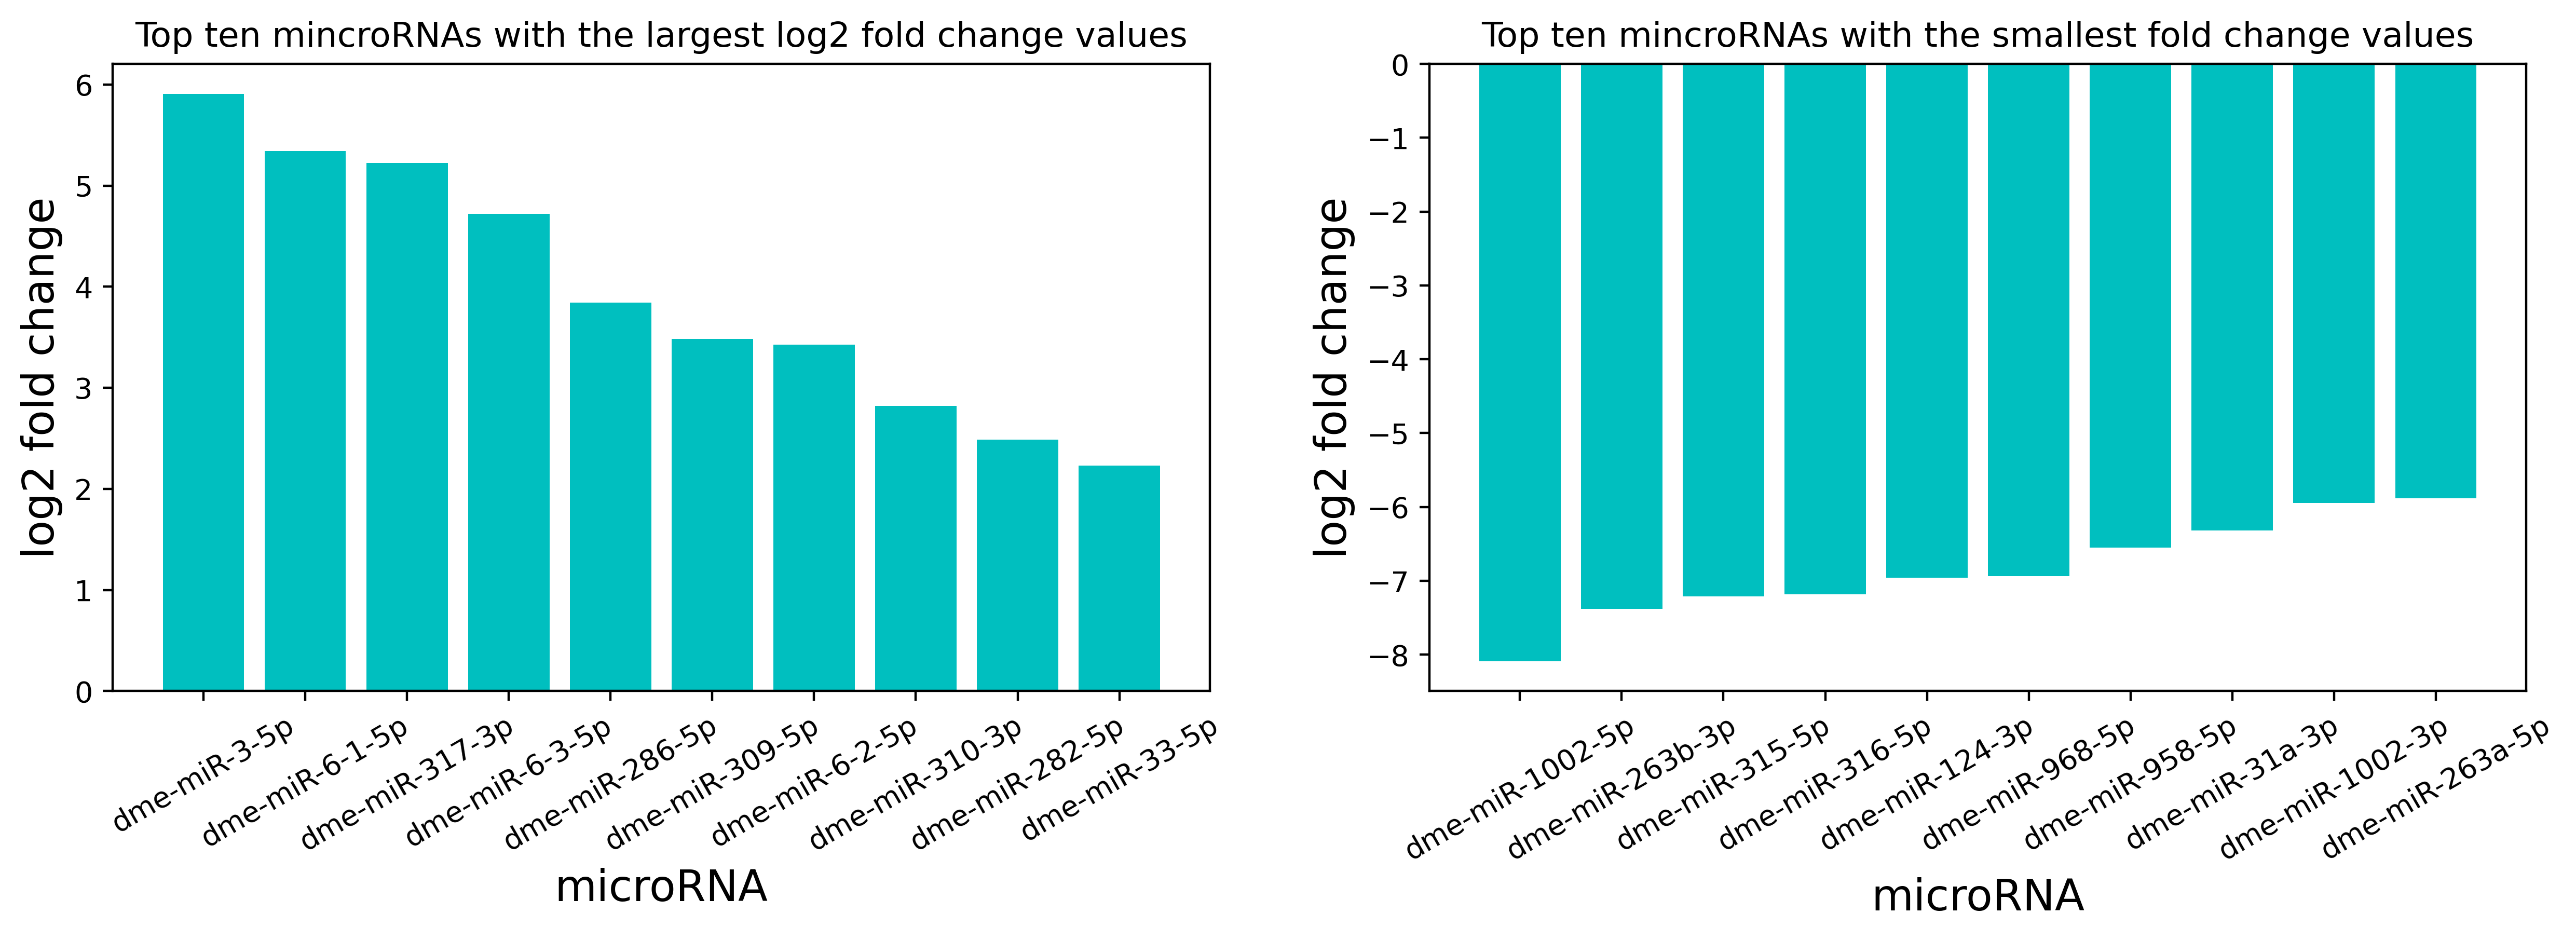

In [80]:
import matplotlib.pyplot as plt

y_max = list(max5['log2 fold change']) 
x_max = list(max5['Unnamed: 0']) 

y_min = list(min5['log2 fold change'])
x_min = list(min5['Unnamed: 0'])

plt.figure(figsize=(15,4),dpi=400)  
plt.subplot(121)
plt.title('Top ten mincroRNAs with the largest log2 fold change values', fontsize=12)
plt.xlabel('microRNA', fontsize = 15)
plt.ylabel('log2 fold change', fontsize = 15)
bar1 = plt.bar(x_max,  y_max, color='c')
plt.setp(plt.gca().get_xticklabels(), rotation=30)


plt.subplot(122)
plt.title('Top ten mincroRNAs with the smallest fold change values', fontsize=12)
plt.xlabel('microRNA', fontsize = 15)
plt.ylabel('log2 fold change', fontsize = 15)
bar2 = plt.bar(x_min,  y_min, color='c')
plt.setp(plt.gca().get_xticklabels(), rotation=30)

plt.savefig('./log2.png', format="png", dpi=500, bbox_inches = 'tight')
plt.show()

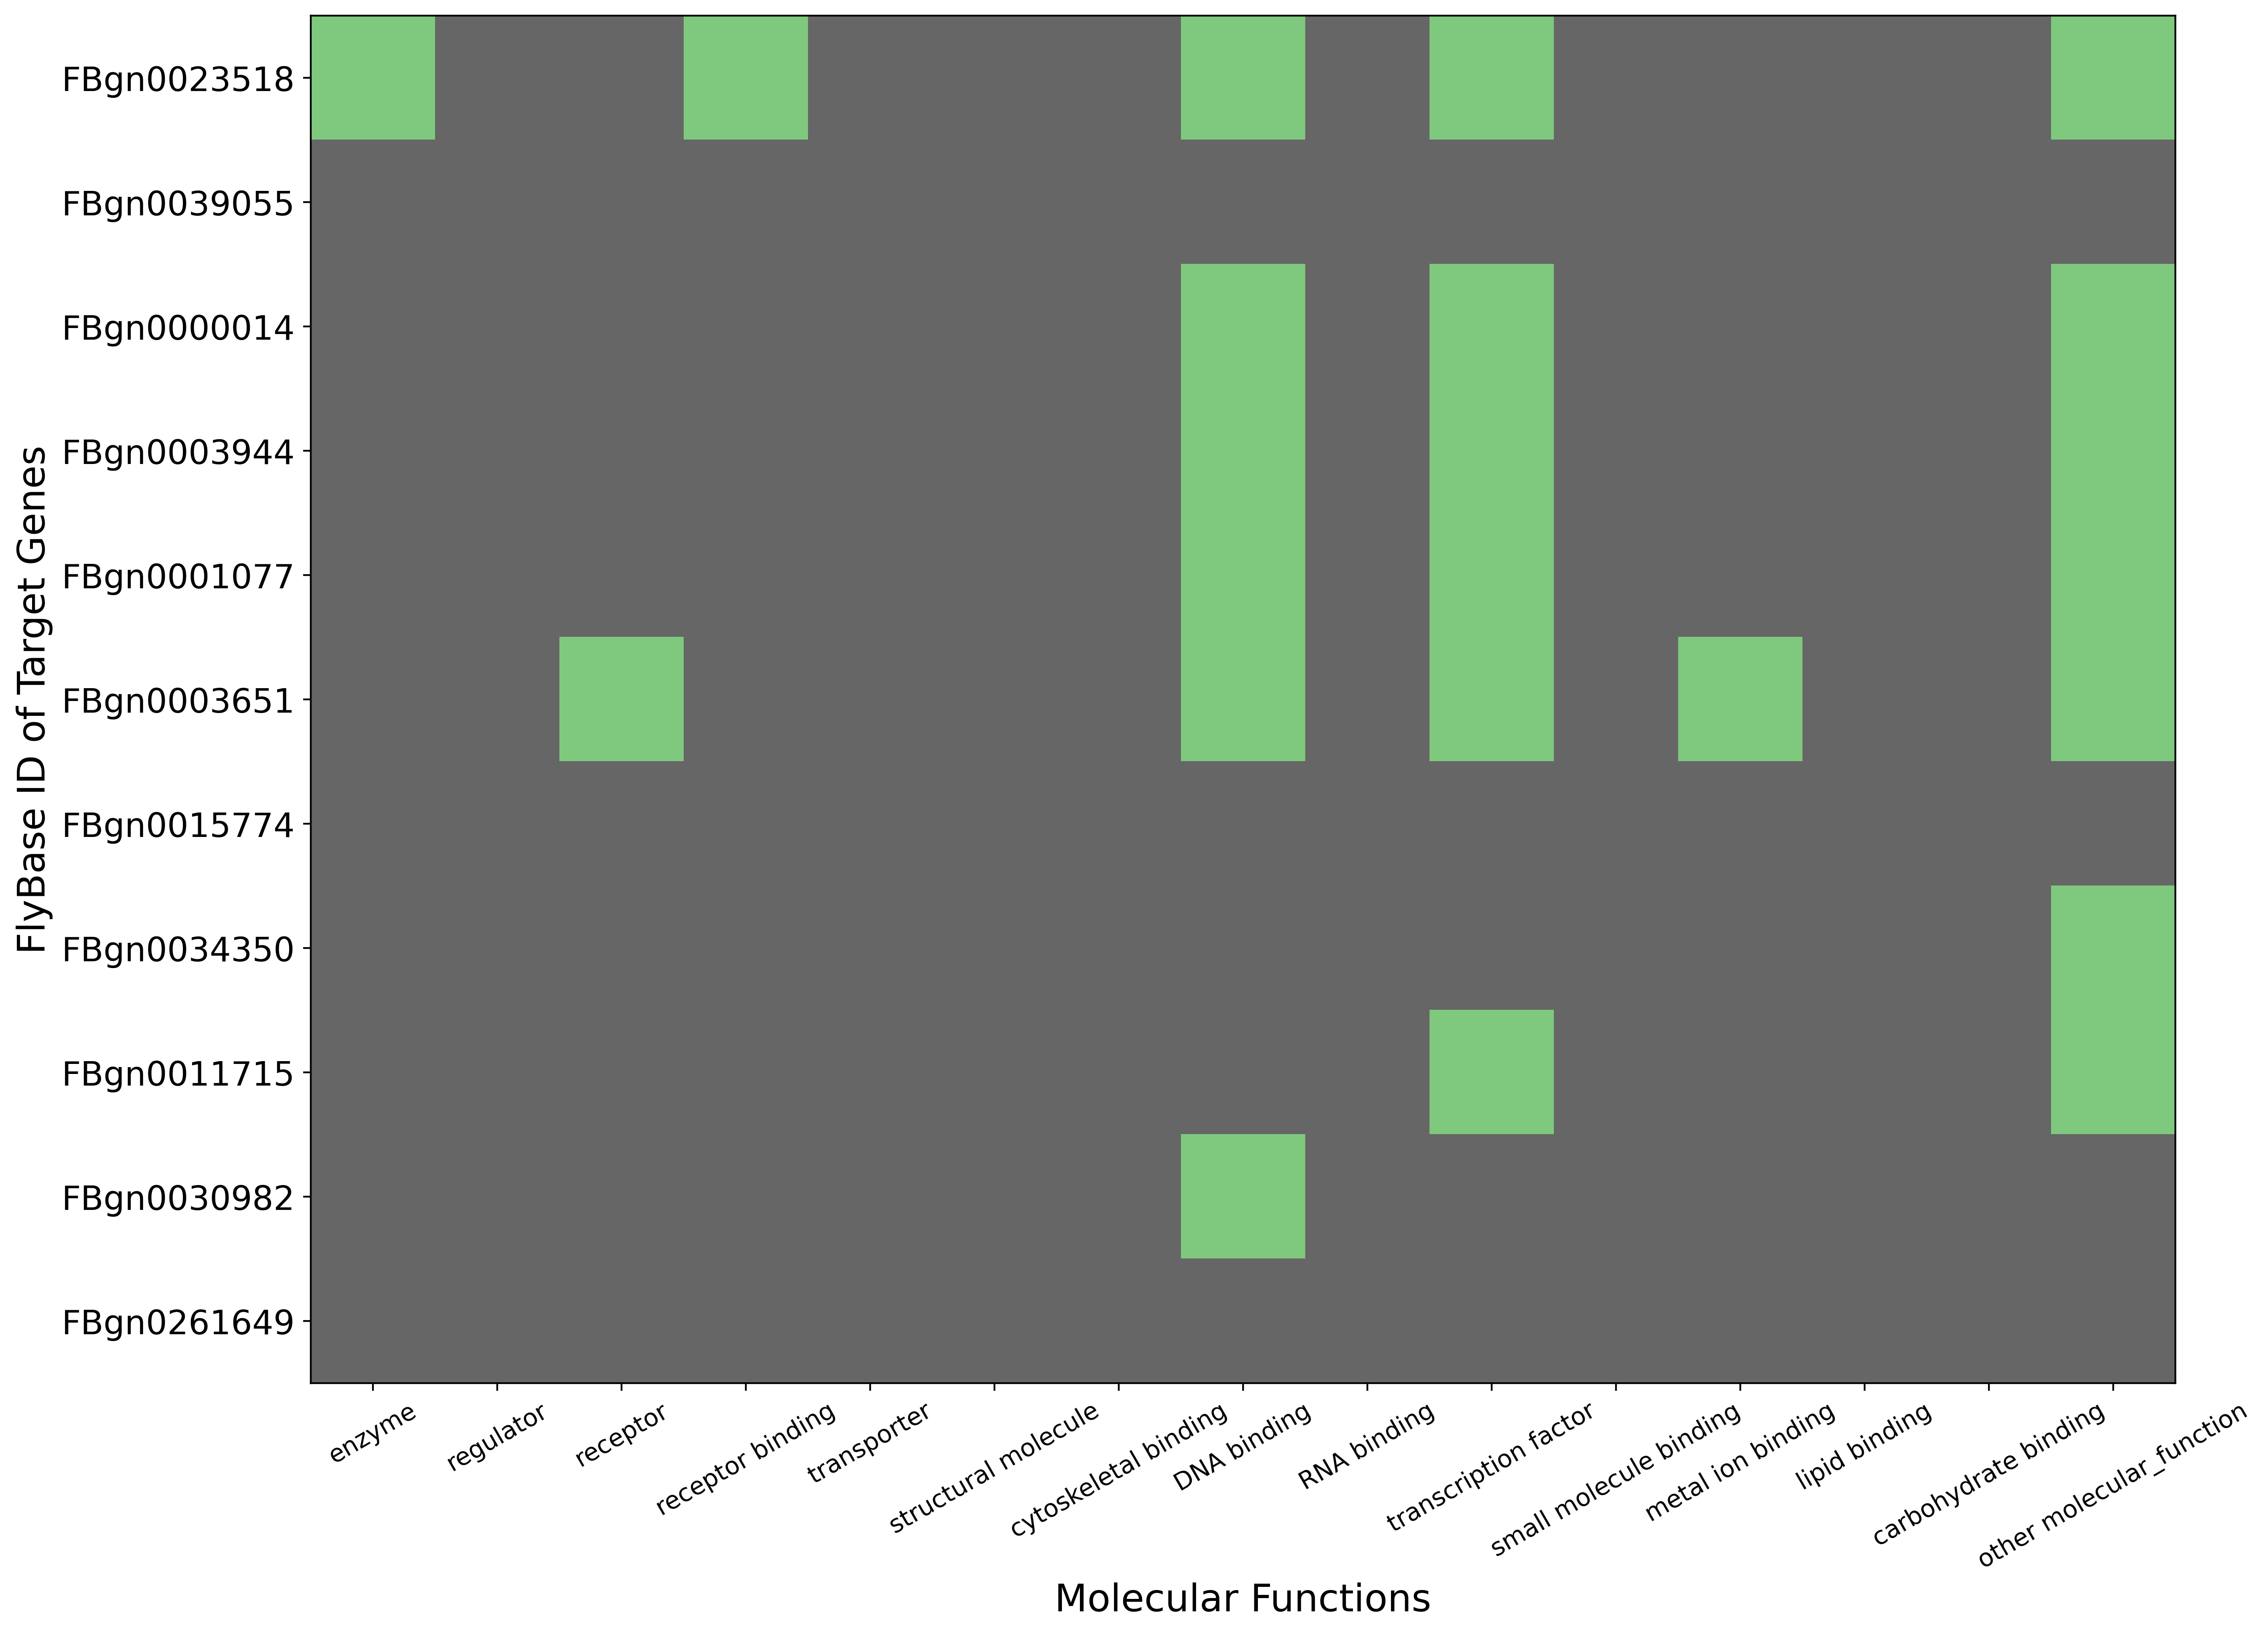

In [88]:
import matplotlib.pyplot as plt
x = ['enzyme','regulator','receptor','receptor binding','transporter','structural molecule','cytoskeletal binding','DNA binding','RNA binding','transcription factor','small molecule binding','metal ion binding','lipid binding','carbohydrate binding','other molecular_function']

y = ['FBgn0023518','FBgn0039055','FBgn0000014','FBgn0003944','FBgn0001077','FBgn0003651','FBgn0015774','FBgn0034350','FBgn0011715','FBgn0030982','FBgn0261649']
v = [[1,0,0,1,0,0,0,1,0,1,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,1,0,1,0,0,0,0,1],[0,0,0,0,0,0,0,1,0,1,0,0,0,0,1],[0,0,0,0,0,0,0,1,0,1,0,0,0,0,1],[0,0,1,0,0,0,0,1,0,1,0,1,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,1,0,0,0,0,1],[0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
plt.figure(figsize=(15,15),dpi=400)   
#plt.title('Molecular function prediction of microRNA dme-miR-3-5p', fontsize=15)
plt.xlabel('Molecular Functions', fontsize = 17)
plt.ylabel('FlyBase ID of Target Genes', fontsize = 17)
plt.imshow(v, cmap='Accent_r')
plt.xticks(range(0,15), x, fontsize= 11)
plt.yticks(range(0,11), y, fontsize= 15)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.savefig('./31.png', format="png", dpi=500, bbox_inches = 'tight')
plt.show()

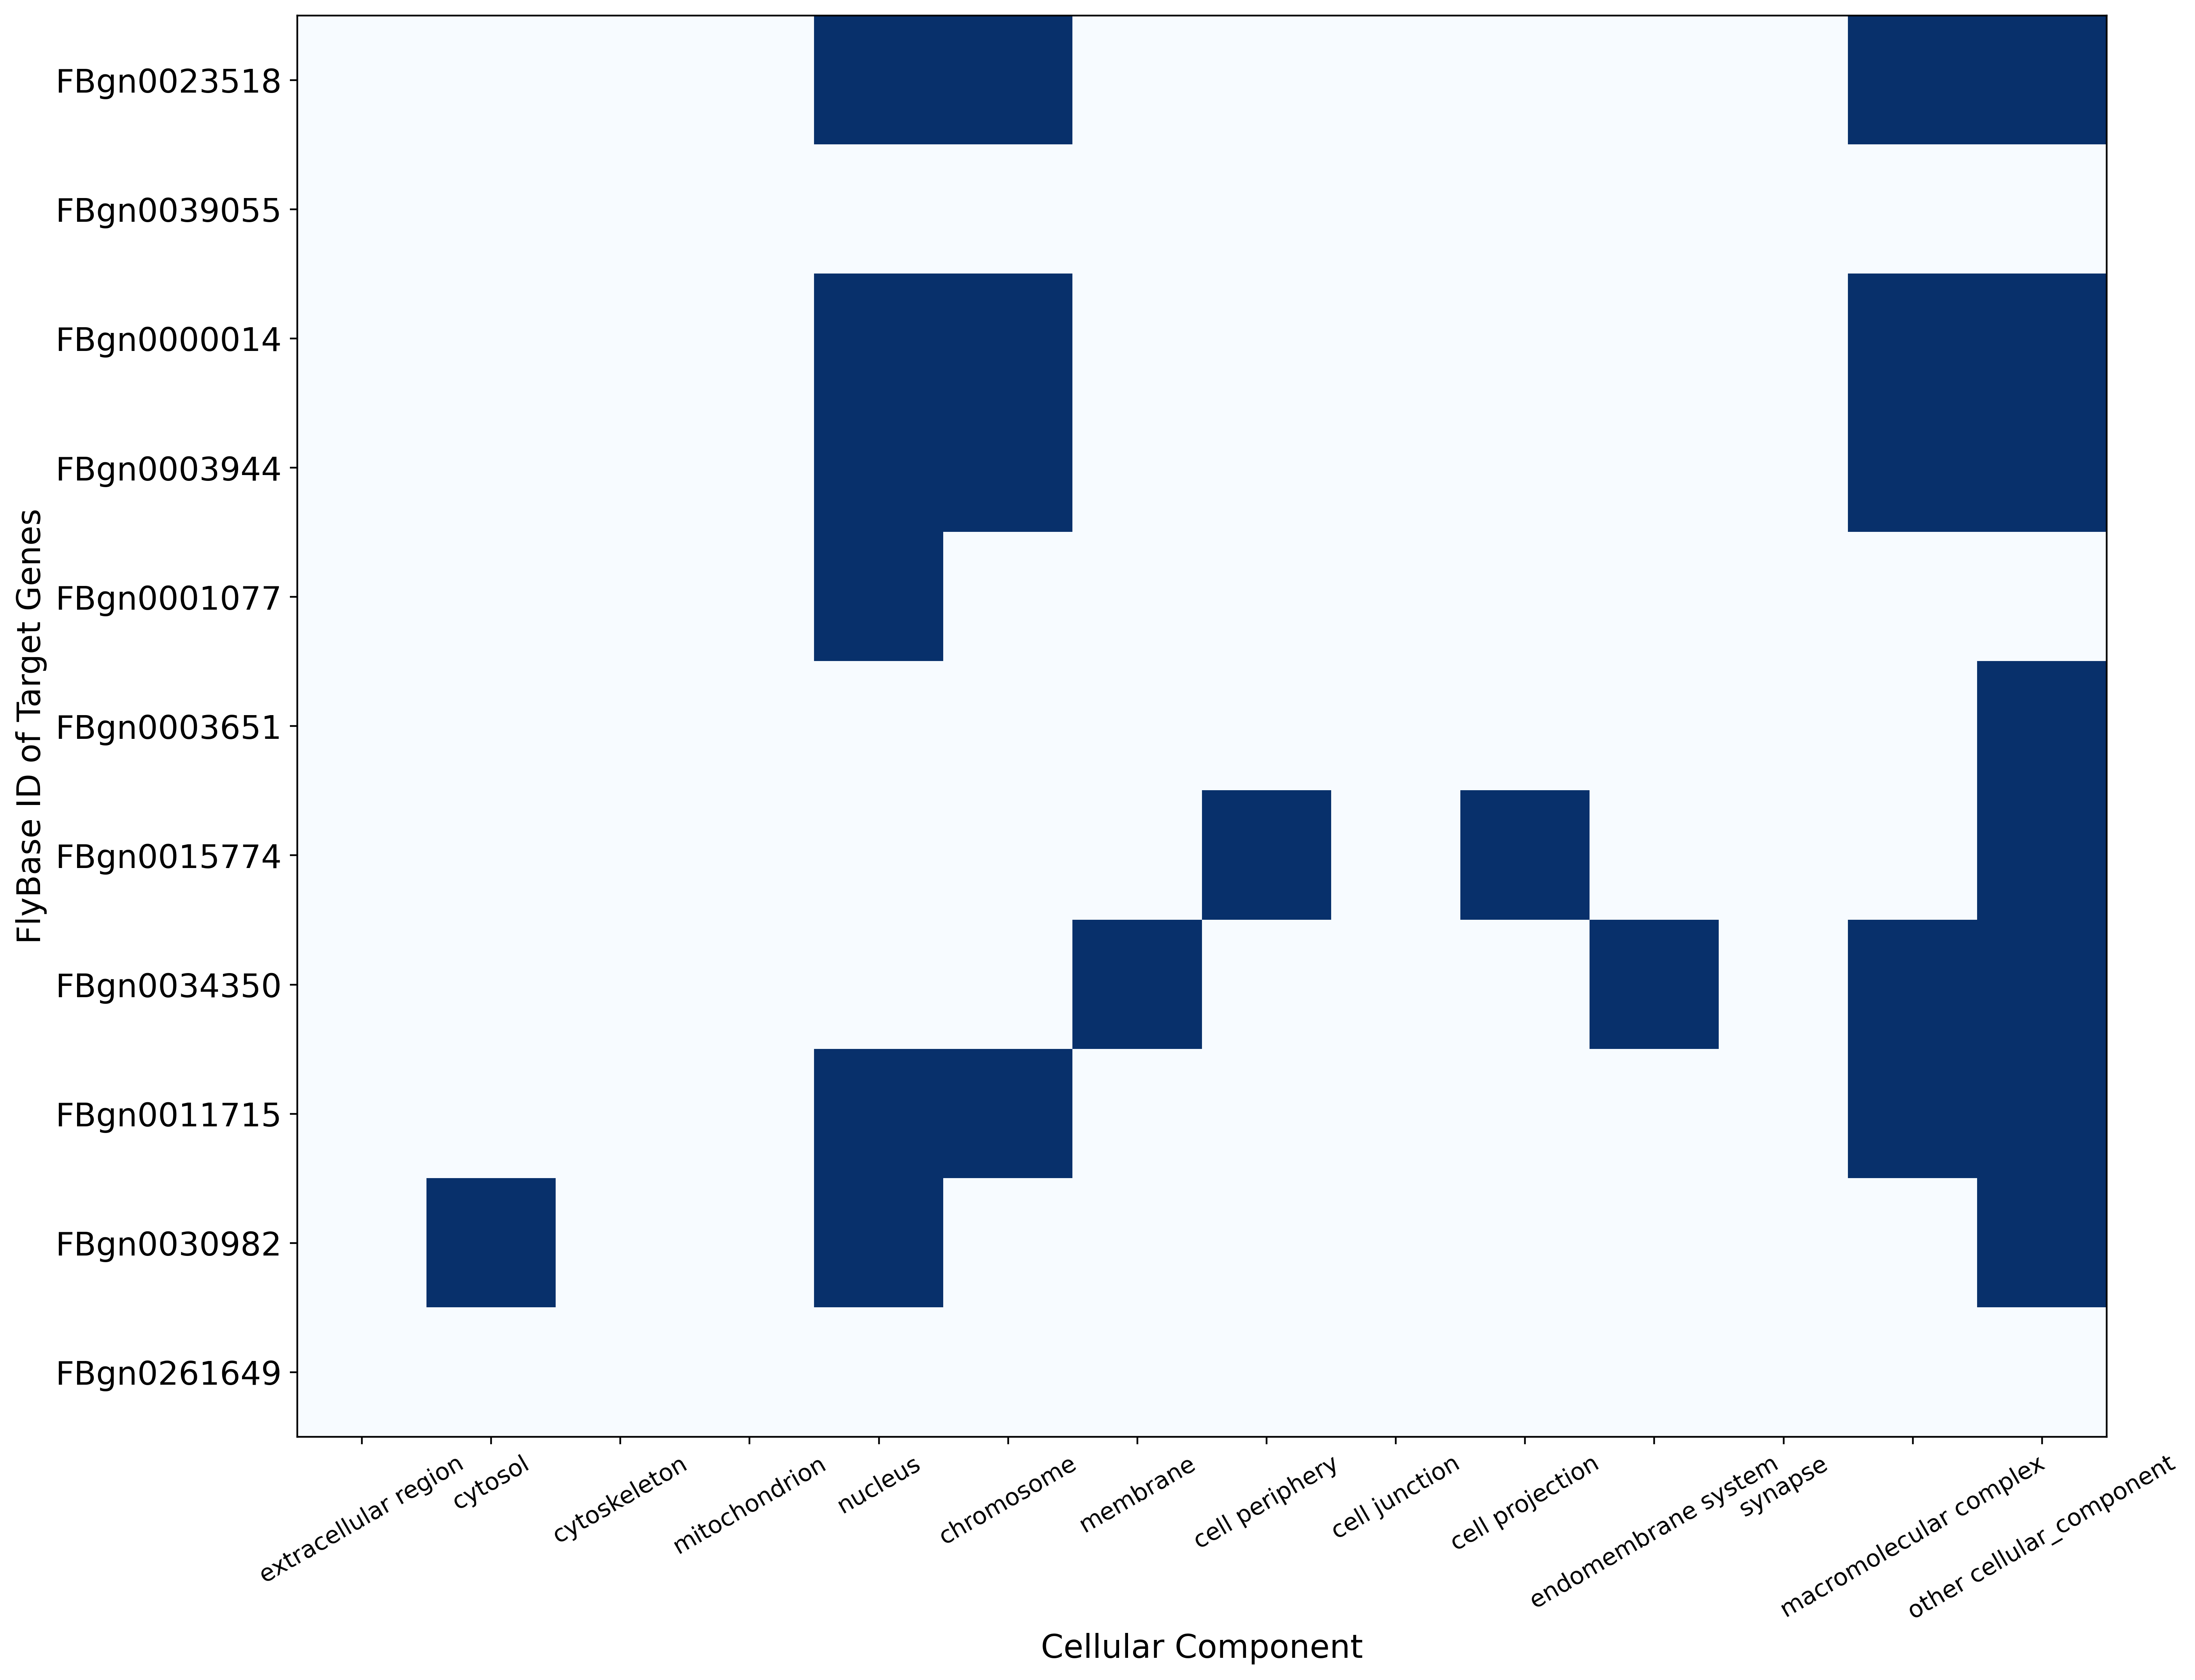

In [89]:
x = ['extracellular region','cytosol','cytoskeleton','mitochondrion','nucleus','chromosome','membrane','cell periphery','cell junction','cell projection','endomembrane system','synapse','macromolecular complex','other cellular_component']
 
y = ['FBgn0023518','FBgn0039055','FBgn0000014','FBgn0003944','FBgn0001077','FBgn0003651','FBgn0015774','FBgn0034350','FBgn0011715','FBgn0030982','FBgn0261649']

v = [[0,0,0,0,1,1,0,0,0,0,0,0,1,1],[0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,1,1,0,0,0,0,0,0,1,1],[0,0,0,0,1,1,0,0,0,0,0,0,1,1],[0,0,0,0,1,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,1,0,1,0,0,0,1],[0,0,0,0,0,0,1,0,0,0,1,0,1,1],[0,0,0,0,1,1,0,0,0,0,0,0,1,1],[0,1,0,0,1,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
plt.figure(figsize=(15,15),dpi=400)   
#plt.title('Top ten mincroRNAs with the largest log2 fold change values', fontsize=12)
plt.xlabel('Cellular Component', fontsize = 15)
plt.ylabel('FlyBase ID of Target Genes', fontsize = 15)
plt.imshow(v, cmap='Blues')
plt.xticks(range(0,14), x, fontsize= 11)
plt.yticks(range(0,11), y, fontsize= 15)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.savefig('./32.png', format="png", dpi=500)
plt.show()

10
15
10


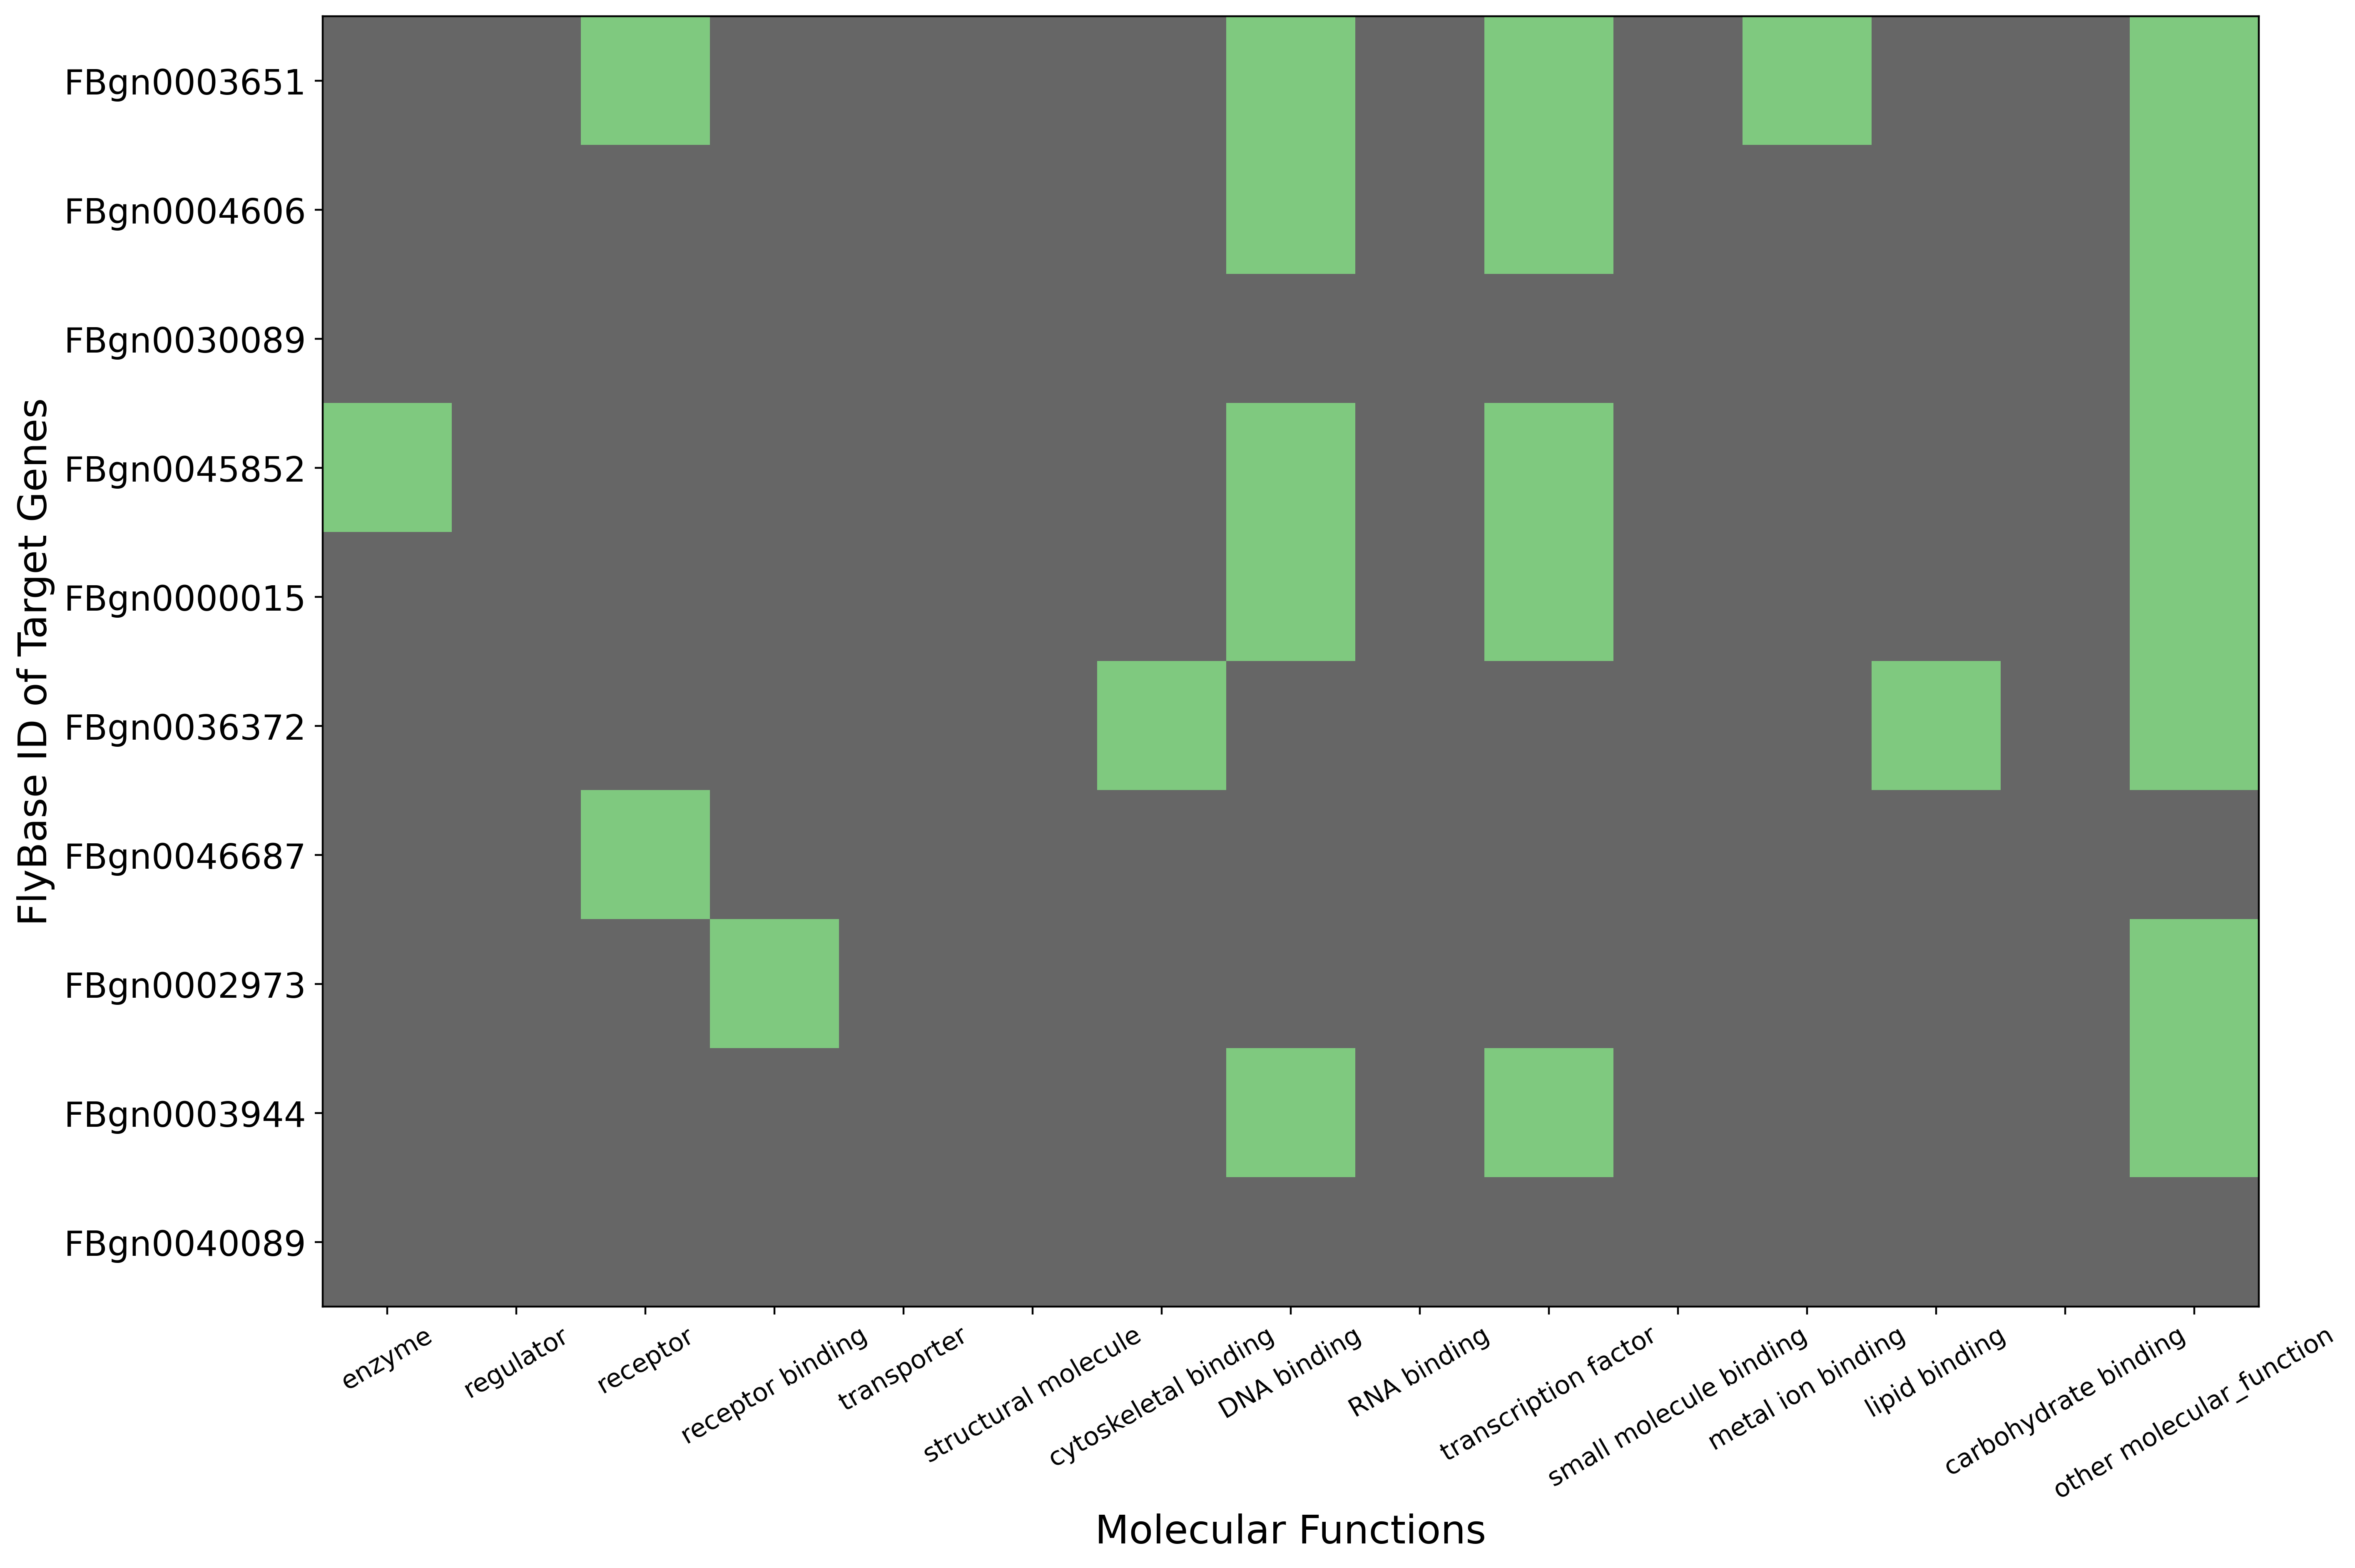

In [102]:
x = ['enzyme','regulator','receptor','receptor binding','transporter','structural molecule','cytoskeletal binding','DNA binding','RNA binding','transcription factor','small molecule binding','metal ion binding','lipid binding','carbohydrate binding','other molecular_function']

y = ['FBgn0003651','FBgn0004606','FBgn0030089','FBgn0045852','FBgn0000015','FBgn0036372','FBgn0046687','FBgn0002973','FBgn0003944','FBgn0040089']
v = [[0,0,1,0,0,0,0,1,0,1,0,1,0,0,1],[0,0,0,0,0,0,0,1,0,1,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
     [1,0,0,0,0,0,0,1,0,1,0,0,0,0,1],[0,0,0,0,0,0,0,1,0,1,0,0,0,0,1],[0,0,0,0,0,0,1,0,0,0,0,0,1,0,1],[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,1,0,1,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
plt.figure(figsize=(15,15),dpi=400)   
#plt.title('Molecular function prediction of microRNA dme-miR-3-5p', fontsize=15)
plt.xlabel('Molecular Functions', fontsize = 17)
plt.ylabel('FlyBase ID of Target Genes', fontsize = 17)
plt.imshow(v, cmap='Accent_r')
plt.xticks(range(0,15), x, fontsize= 11)
plt.yticks(range(0,10), y, fontsize= 15)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.savefig('./61.png', format="png", dpi=500, bbox_inches = 'tight')
plt.show()

10
14
10


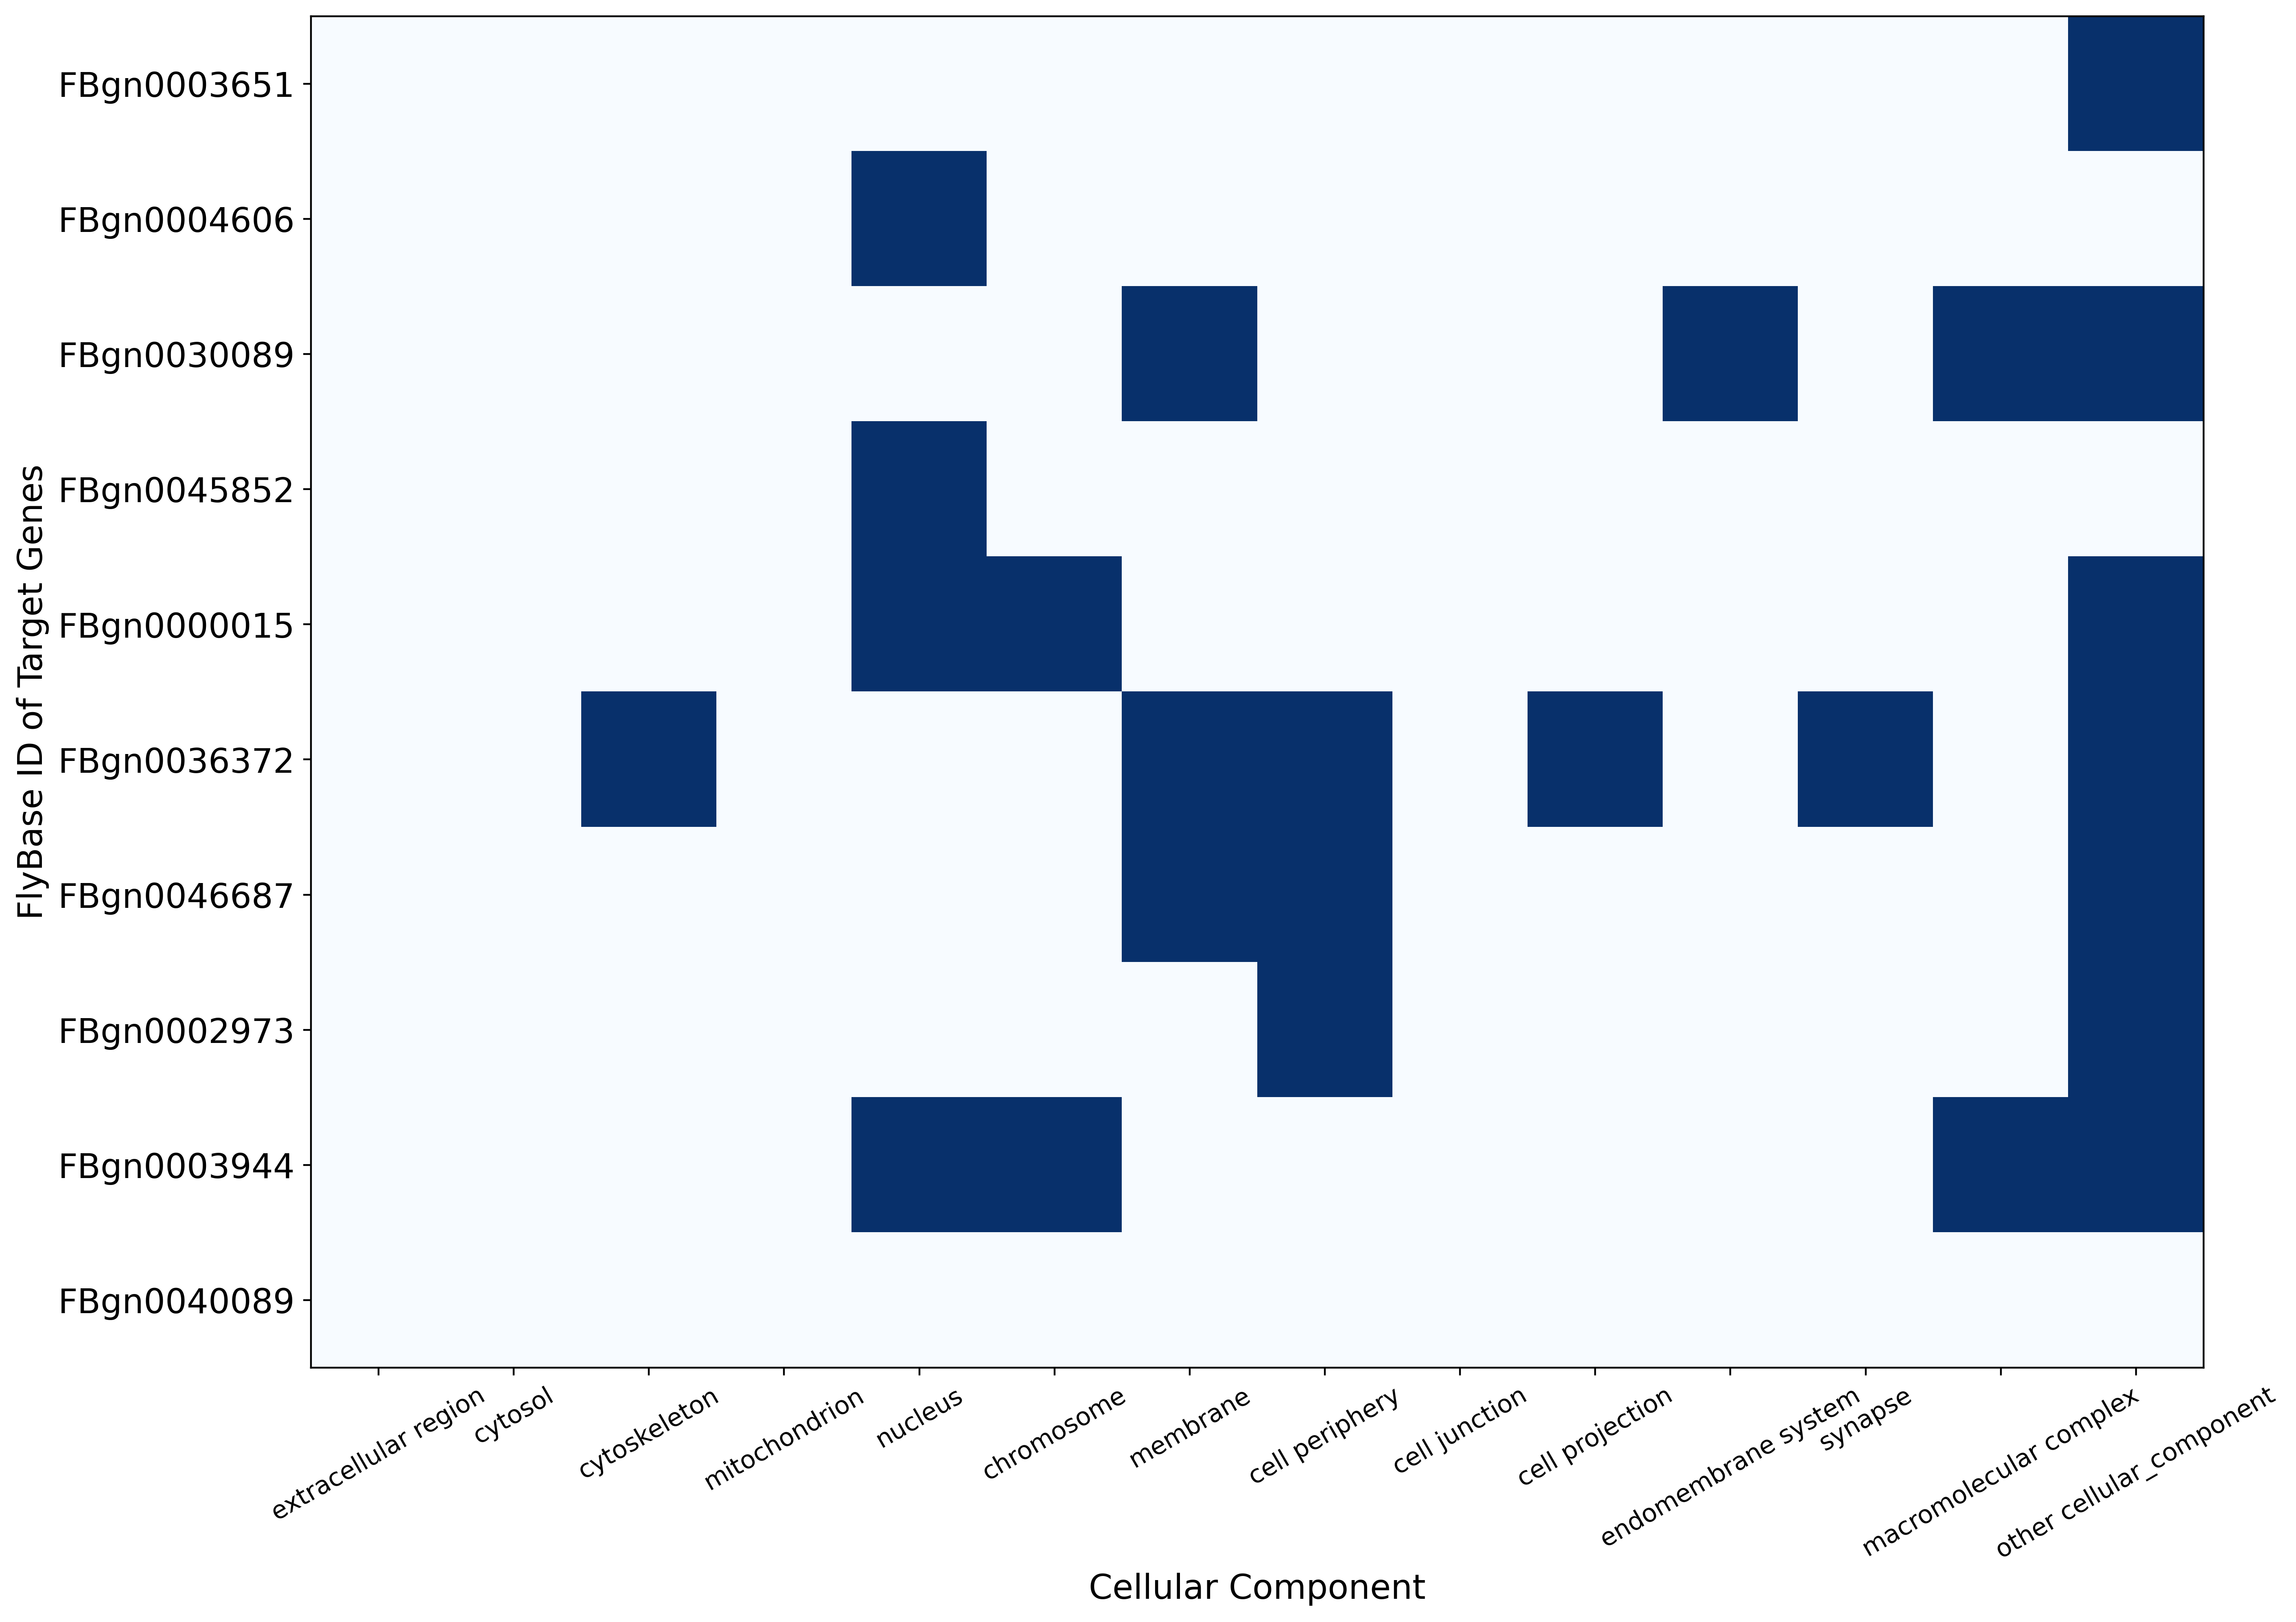

In [15]:
x = ['extracellular region','cytosol','cytoskeleton','mitochondrion','nucleus','chromosome','membrane','cell periphery','cell junction','cell projection','endomembrane system','synapse','macromolecular complex','other cellular_component']

y = ['FBgn0003651','FBgn0004606','FBgn0030089','FBgn0045852','FBgn0000015','FBgn0036372','FBgn0046687','FBgn0002973','FBgn0003944','FBgn0040089']
v = [[0,0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,1,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,1,0,0,0,1,0,1,1],[0,0,0,0,1,0,0,0,0,0,0,0,0,0],[0,0,0,0,1,1,0,0,0,0,0,0,0,1],[0,0,1,0,0,0,1,1,0,1,0,1,0,1],[0,0,0,0,0,0,1,1,0,0,0,0,0,1],[0,0,0,0,0,0,0,1,0,0,0,0,0,1],[0,0,0,0,1,1,0,0,0,0,0,0,1,1],[0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
print(len(v))
print(len(x))
print(len(y))
plt.figure(figsize=(15,15),dpi=400)   
#plt.title('Top ten mincroRNAs with the largest log2 fold change values', fontsize=12)
plt.xlabel('Cellular Component', fontsize = 15)
plt.ylabel('FlyBase ID of Target Genes', fontsize = 15)
plt.imshow(v, cmap='Blues')
plt.xticks(range(0,14), x, fontsize= 11)
plt.yticks(range(0,10), y, fontsize= 15)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.savefig('./62.png', format="png", dpi=500)
plt.show()